# El Farol Bar Problem
### Advanced Aspects of Nature-Inspired Search and Optimisation

## Parameter Tuning Experiments

In [1]:
import functools
import multiprocessing

import matplotlib.pyplot as plt
import seaborn as sns

import ea

In [17]:
RUNS = 100

# Default args
lambda_ = 250
h = 4
weeks = 5
max_t = 10
ea_kwargs = {}

In [18]:
def do_run(lambda_, h, weeks, max_t, ea_kwargs, i):
    ea_obj = ea.EA(lambda_, h, weeks, **ea_kwargs)
    mean_attendance = ea_obj.run(max_t)
    
    return mean_attendance

In [19]:
def do_runs(lambda_, h, weeks, max_t, ea_kwargs):
    with multiprocessing.Pool() as pool:
        func = functools.partial(do_run, lambda_, h, weeks, max_t, ea_kwargs)
        mean_attendances = pool.map(func, range(RUNS))
    return mean_attendances

### Defaults

In [38]:
# Results store for plotting
plot_x = []
plot_y = []

In [39]:
%%capture
results = do_runs(lambda_, h, weeks, max_t, ea_kwargs)

plot_x.append(results)
plot_y.append('defaults')

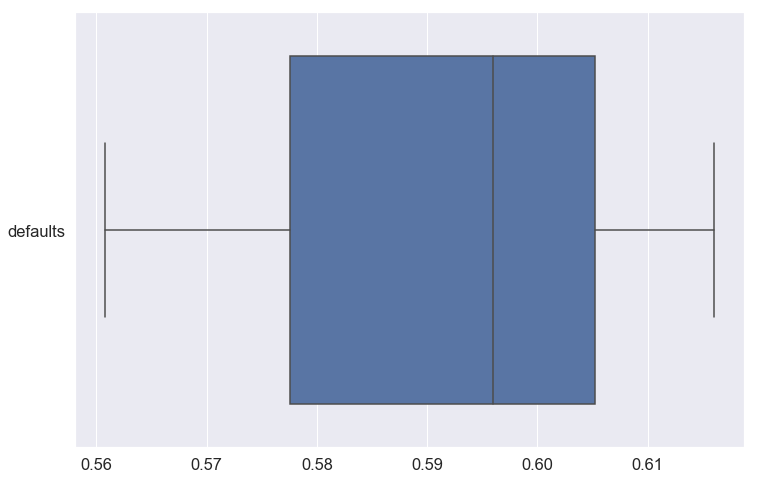

In [40]:
sns.set(font_scale=1.5)
plt.figure(figsize=(12, 8))
sns.boxplot(x=plot_x, y=plot_y)

### Lambda

In [9]:
# Results store for plotting
plot_x_lambda = []
plot_y_lambda = []

In [10]:
%%capture
lambdas = [
    50,
    100,
    150,
    200,
    250,
]

for l in lambdas:
    results = do_runs(l, h, weeks, max_t, ea_kwargs)

    plot_x_lambda.append(results)
    plot_y_lambda.append(f'lambda={l}')

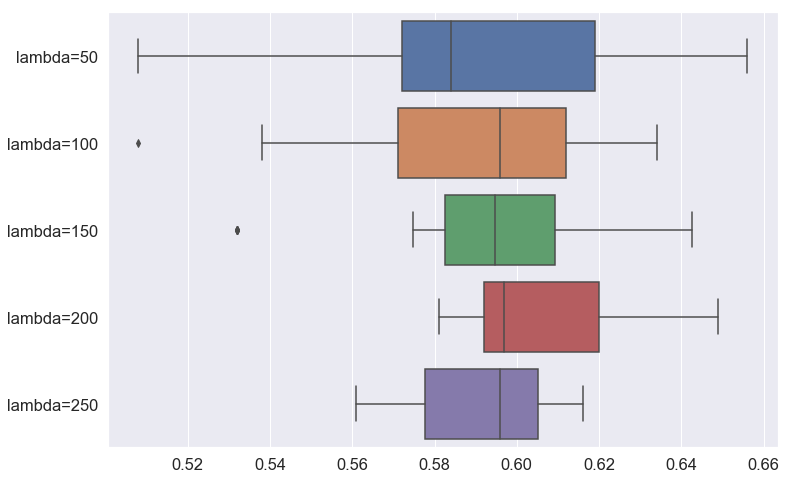

In [11]:
sns.set(font_scale=1.5)
plt.figure(figsize=(12, 8))
sns.boxplot(x=plot_x_lambda, y=plot_y_lambda)

### Parent Proportion

In [28]:
# Results store for plotting
plot_x_pp = []
plot_y_pp = []

In [29]:
%%capture
parent_proportions = [
    0.2,
    0.3,
    0.4,
]

for pp in parent_proportions:
    eak = {'parent_proportion': pp}
    results = do_runs(lambda_, h, weeks, max_t, eak)

    plot_x_pp.append(results)
    plot_y_pp.append(f'parent_proportion={pp}')

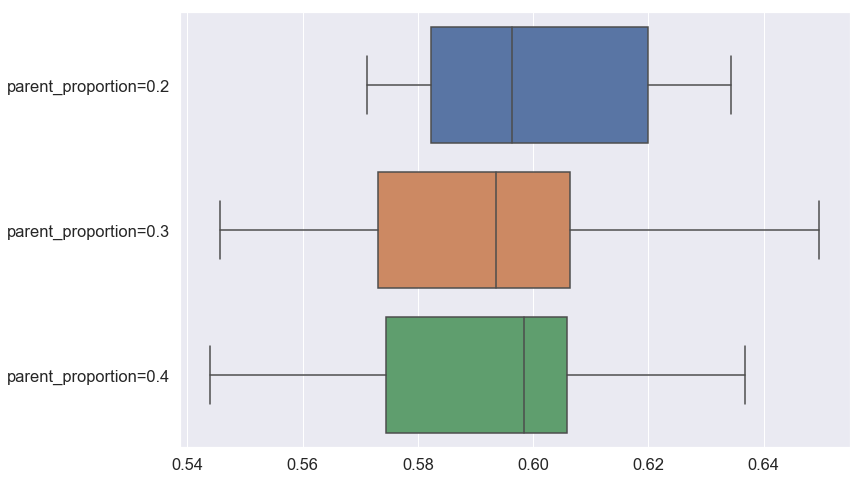

In [30]:
sns.set(font_scale=1.5)
plt.figure(figsize=(12, 8))
sns.boxplot(x=plot_x_pp, y=plot_y_pp)

### Mutation Chance

In [34]:
# Results store for plotting
plot_x_mc = []
plot_y_mc = []

In [36]:
%%capture
mutation_chances = [
    0.1,
    0.25,
    0.5,
    1.0,
]

for mc in mutation_chances:
    eak = {'mutation_chance': mc}
    results = do_runs(lambda_, h, weeks, max_t, eak)

    plot_x_mc.append(results)
    plot_y_mc.append(f'mutation_chance={mc}')

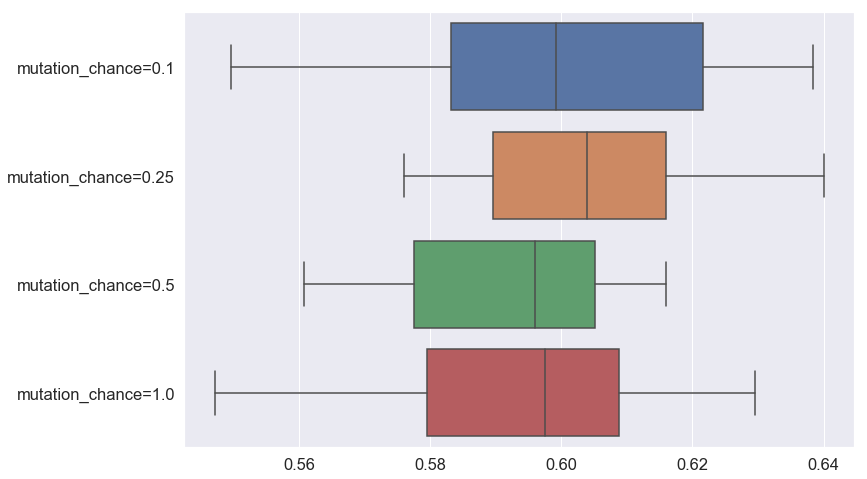

In [37]:
sns.set(font_scale=1.5)
plt.figure(figsize=(12, 8))
sns.boxplot(x=plot_x_mc, y=plot_y_mc)

### Mutation Rate

In [31]:
# Results store for plotting
plot_x_mr = []
plot_y_mr = []

In [32]:
%%capture
mutation_rates = [
    None,
    0.25,
    0.5,
]
0
for mr in mutation_rates:
    eak = {'mutation_rate': mr}
    results = do_runs(lambda_, h, weeks, max_t, eak)

    plot_x_mr.append(results)
    plot_y_mr.append(f'mutation_rate={mr}')

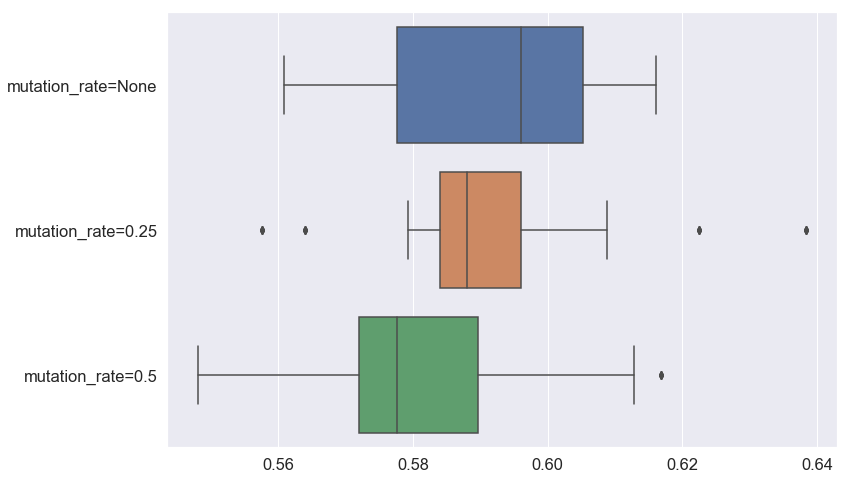

In [33]:
sns.set(font_scale=1.5)
plt.figure(figsize=(12, 8))
sns.boxplot(x=plot_x_mr, y=plot_y_mr)